#### Yingying Huang
#### Fall B 2019
#### ALY 6140
#### Assignment 2.5
#### Last Updated: 11/24/2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

### Part. 1  - An economist asserts that [logged] Truck Tonnage correlates well with the S&P 500.

- [x] Retrieve the data for each series
- [x] Apply a log transform to the data (where appropriate).
- [x] Plot the data and identify any relationships
- [x] Shade areas that contain recessions
- [x] Explain how the information may or may not be used


#### 1. Retrieve the data for each series

In [2]:
start_date = '1990-01-01'
end_date = '2019-11-17'
sp500_data = data.get_data_yahoo('SPY', start_date, end_date, interval='m')

In [3]:
sp500_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-01,43.96875,43.75000,43.96875,43.93750,1003200.0,26.583992
1993-02-01,45.12500,42.81250,43.96875,44.40625,5417600.0,26.867605
1993-03-01,45.84375,44.21875,44.56250,45.18750,3019200.0,27.340281
1993-04-01,45.25000,43.28125,45.25000,44.03125,2697200.0,26.766541
1993-05-01,45.65625,43.84375,44.09375,45.21875,1808000.0,27.488407


In [4]:
sp500_data.columns.values.tolist()

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [5]:
truckd11_data = pd.read_csv("Data/TRUCKD11.csv", na_values=".").dropna()
truckd11_data['DATE'] = pd.to_datetime(truckd11_data['DATE'])
recession_data = pd.read_excel("Data/Recession.xlsx", na_values = ".").dropna()
recession_data['Peak'] = pd.to_datetime(recession_data['Peak'])
recession_data['Trough'] = pd.to_datetime(recession_data['Trough'])

In [6]:
sp500_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-01,43.96875,43.75000,43.96875,43.93750,1003200.0,26.583992
1993-02-01,45.12500,42.81250,43.96875,44.40625,5417600.0,26.867605
1993-03-01,45.84375,44.21875,44.56250,45.18750,3019200.0,27.340281
1993-04-01,45.25000,43.28125,45.25000,44.03125,2697200.0,26.766541
1993-05-01,45.65625,43.84375,44.09375,45.21875,1808000.0,27.488407


In [7]:
truckd11_data.head()

,DATE,TRUCKD11
0,2000-01-01,80.2
1,2000-02-01,79.7
2,2000-03-01,74.1
3,2000-04-01,72.8
4,2000-05-01,73.0


In [8]:
recession_data.head()

,Peak,Trough
0,1857-06-01,1858-12-01
1,1860-10-01,1861-06-01
2,1865-04-01,1867-12-01
3,1869-06-01,1870-12-01
4,1873-10-01,1879-03-01


In [9]:
sp500_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000
mean,140.094157,131.235034,135.810304,136.477291,1.762620e+09,112.908763
std,63.907277,61.129584,62.567740,63.011907,1.915812e+09,68.002647
min,43.968750,42.812500,43.343750,43.937500,1.003200e+06,26.583992
25%,101.340000,91.562500,97.281250,97.346249,1.567632e+08,71.395927
50%,129.160004,120.400002,125.190002,125.500000,1.303830e+09,93.760384
75%,157.185005,149.570000,153.584999,155.659996,2.736336e+09,134.952087
max,312.690002,304.739990,304.920013,310.959991,1.188235e+10,310.959991


In [10]:
truckd11_data.describe()

,TRUCKD11
count,237.000000
mean,89.558650
std,12.010027
min,72.600000
25%,81.200000
50%,85.800000
75%,98.600000
max,120.000000


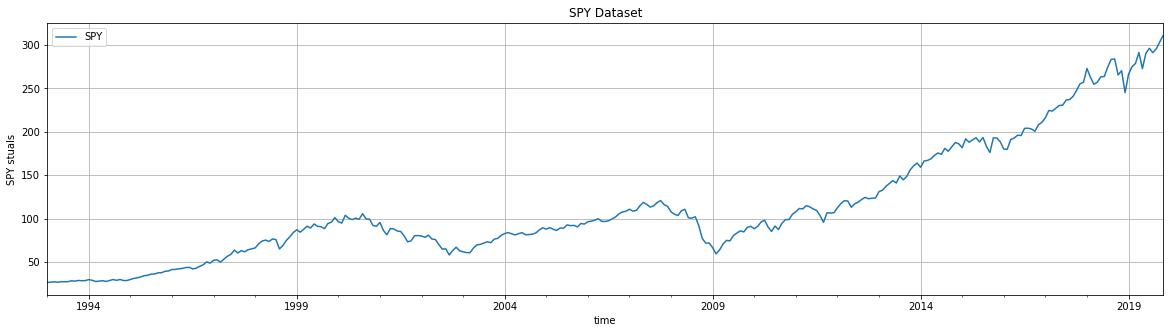

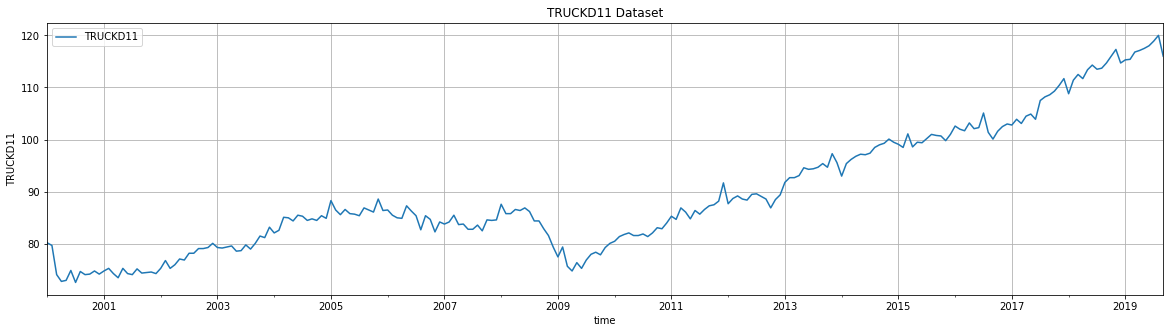

In [11]:
sp500_data.plot(y = "Adj Close", label = "SPY", figsize = (20,5))
plt.xlabel("time")
plt.ylabel("SPY stuals")
plt.legend(loc="best")
plt.title("SPY Dataset")
plt.grid()
plt.show()

truckd11_data.plot(x="DATE", y="TRUCKD11", label="TRUCKD11", figsize = (20,5))
plt.xlabel("time")
plt.ylabel("TRUCKD11")
plt.legend(loc="best")
plt.title("TRUCKD11 Dataset")
plt.grid()
plt.show()

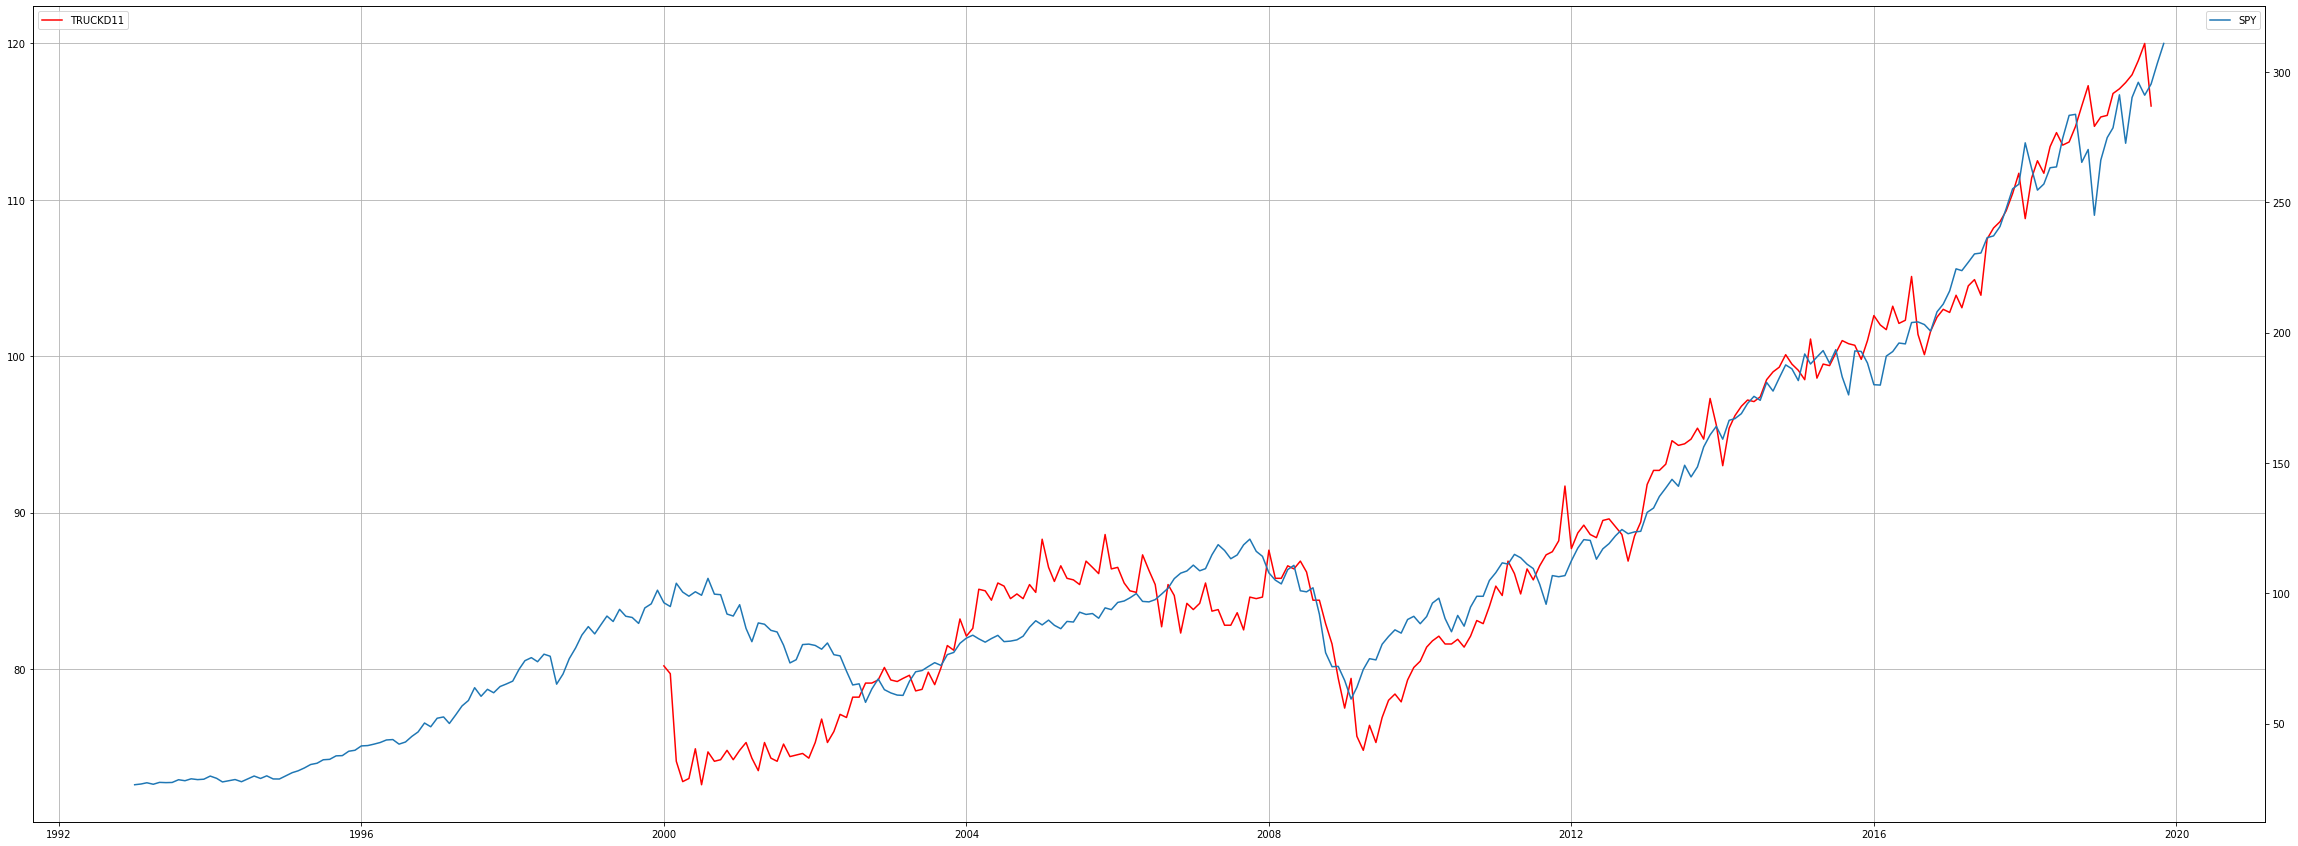

In [12]:
fig = plt.figure(figsize = (40,15))
ax1 = fig.add_subplot(111)
ax1.plot(truckd11_data["DATE"], truckd11_data["TRUCKD11"],'-r', label='TRUCKD11')
# ax1.set_xlim([min(truckd11_data["DATE"]), max(truckd11_data["DATE"])])
plt.legend(loc='upper left')
plt.grid()
ax2 = ax1.twinx()
ax2.plot(sp500_data.index, sp500_data["Adj Close"],'-', label = 'SPY')
# ax2.set_xlim([min(sp500_data["DATE"]), max(sp500_data["DATE"])])

plt.legend(loc='upper right')
plt.show()

#### 2. Apply a log transform to the data (where appropriate). 

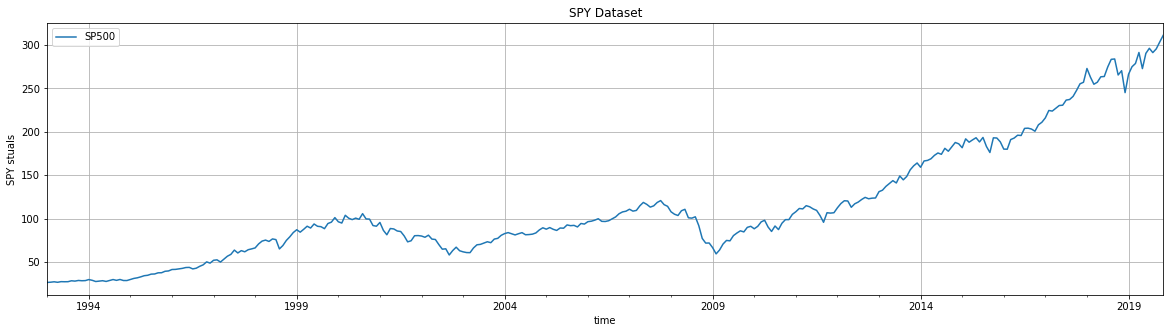

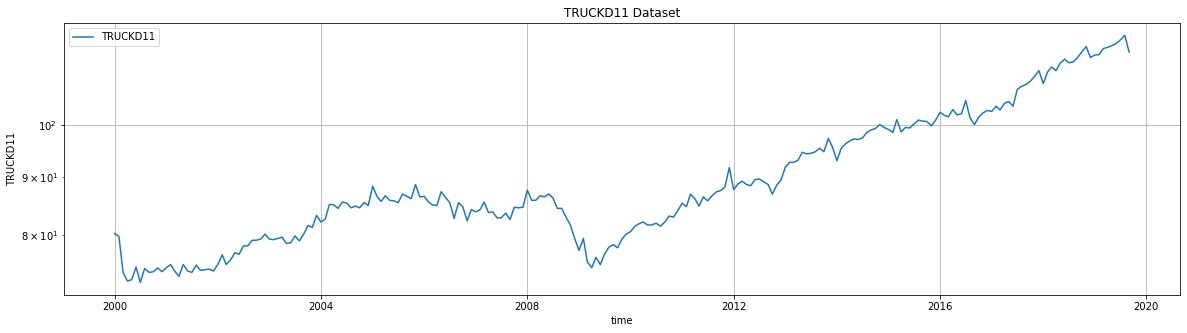

In [13]:
sp500_data.plot(y = "Adj Close", label = "SP500", figsize = (20,5))
plt.xlabel("time")
plt.ylabel("SPY stuals")
plt.legend(loc="best")
plt.title("SPY Dataset")
plt.grid()
plt.show()

# truckd11_data.plot(x="DATE", y="TRUCKD11", label="TRUCKD11", figsize = (20,5))
plt.figure(figsize = (20,5))
plt.semilogy(truckd11_data['DATE'],truckd11_data['TRUCKD11'])
plt.xlabel("time")
plt.ylabel("TRUCKD11")
plt.legend(['TRUCKD11'],loc="best")
plt.title("TRUCKD11 Dataset")
plt.grid()
plt.show()

#### 3. Plot the data and identify any relationships

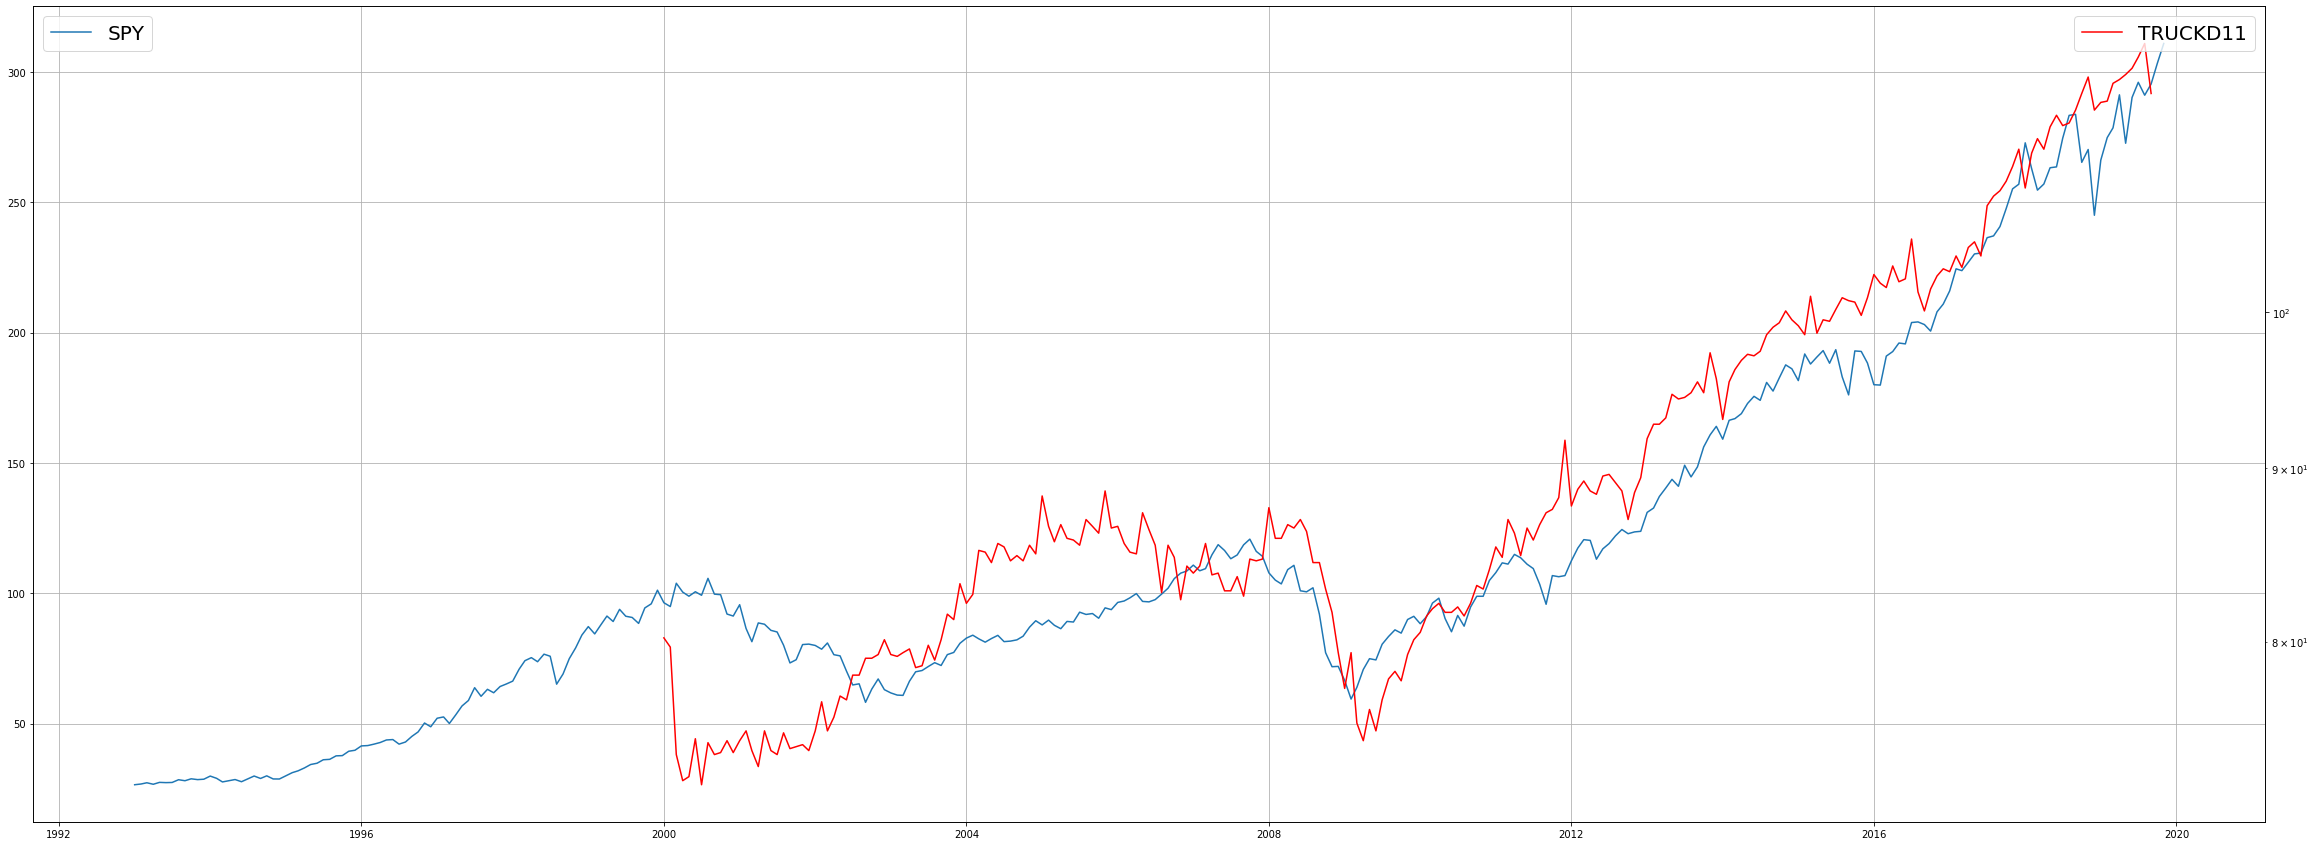

In [14]:
fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(111)

ax1.plot(sp500_data.index, sp500_data["Adj Close"],'-', label = 'SPY')
plt.legend(loc='upper left', prop={'size': 20})
plt.grid()
ax2 = ax1.twinx()

ax2.plot(truckd11_data["DATE"], truckd11_data["TRUCKD11"],'-r', label='TRUCKD11')
ax2.set_yscale('log')
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

#### 4. Shade areas that contain recessions

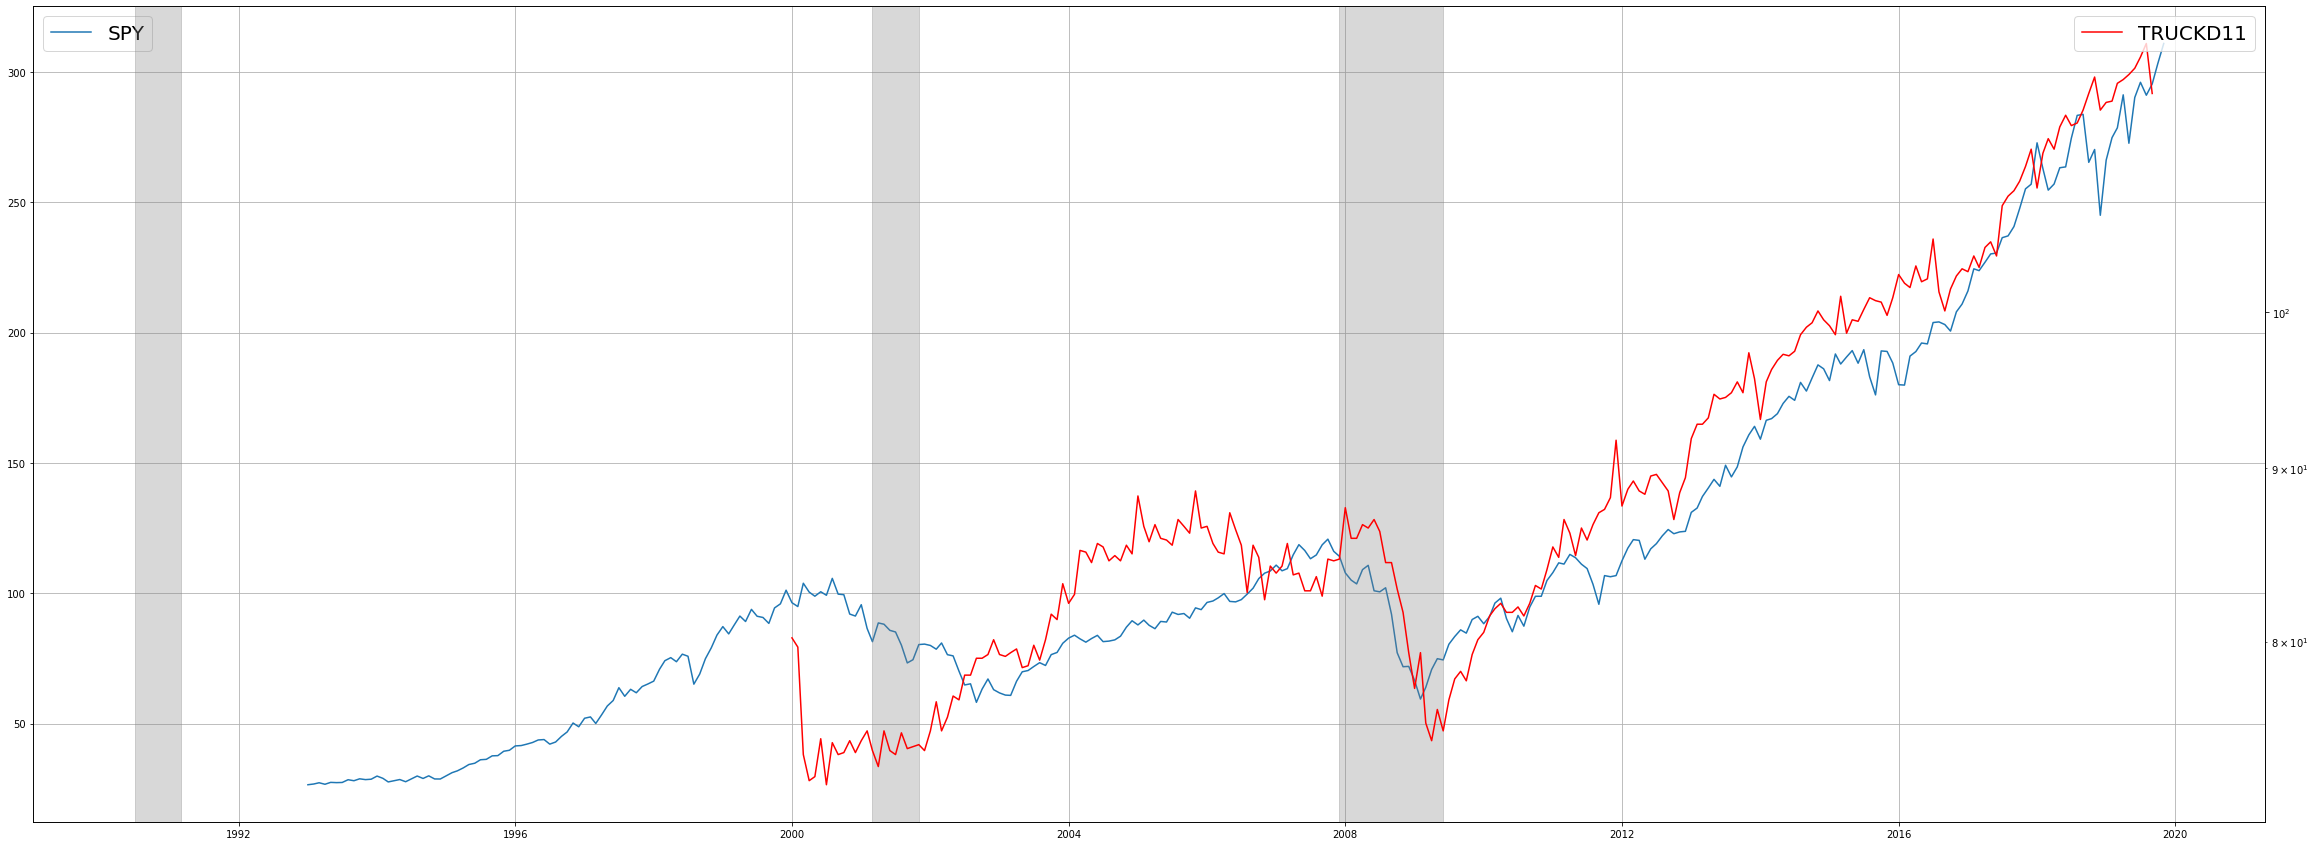

In [15]:
# start_date = min(min(sp500_data.index),min(truckd11_data["DATE"]))
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
fig = plt.figure(figsize = (40,15))
ax1 = fig.add_subplot(111)

ax1.plot(sp500_data.index, sp500_data["Adj Close"],'-', label = 'SPY')
plt.legend(loc='upper left', prop={'size': 20})
plt.grid()

ax2 = ax1.twinx()
ax2.plot(truckd11_data["DATE"], truckd11_data["TRUCKD11"],'-r', label='TRUCKD11')
ax2.set_yscale('log')
plt.legend(loc='upper right', prop={'size': 20})

for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.3)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()


### **Relationships and Explainations:**

The linechart has the X values (Time) on the horizontal (X) axis, and dual Y axis. The left y-axis with blue line is indicate *SPY* values, and the right y-axis and the red line illustrate *TRUCK11* values. From this chart, both variables tend to move in the same direction in the most of time: If one variable increase, the other tend to also increase. If one decreases, the other tends to also.

As these two variables tend to move in the same direction at the most of time. Therefore, the assertation "*Truck Tonnage correlates well with the S&P 500*" can be used.

### Part. 2  - An economist asserts that stock market direction is largely based on whether the S&P 500 Index is above/below the 200 Day Simple Moving Average (SMA).

- [x] Retrieve the data for the S&P 500
- [x] Create simple moving average columns for not only the 200 day SMA, but also for other popular SMAs (e.g., 20, 50, and 100)
- [x] Plot the data and identify any relationships
- [x] Shade areas that contain recessions
- [x] Explain how the information may or may not be used


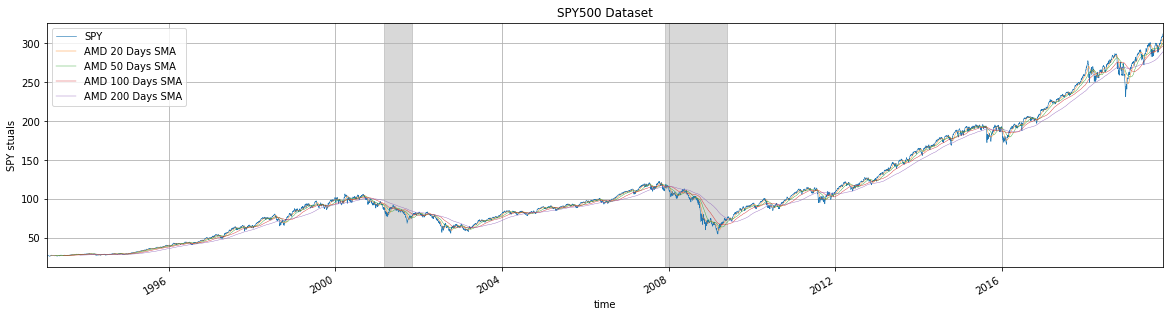

In [16]:
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
sp500_data_d = data.get_data_yahoo('SPY', start_date, end_date, interval='d')

sp500_data_d.plot(y = "Adj Close", label = "SPY", figsize = (20,5), lw=0.6)
plt.xlabel("time")
plt.ylabel("SPY stuals")
plt.grid()


for sp in [20,50,100,200]:
    rolling_mean = sp500_data_d['Adj Close'].rolling(window=sp).mean()
    lb = 'AMD '+ str(sp) +' Days SMA'
    plt.plot(sp500_data_d.index, rolling_mean, label = lb, lw=0.4)

for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.3)

    
plt.legend(loc="best")
plt.title("SPY500 Dataset")
plt.show()

### **Relationships and explaination:**

A simple moving average (SMA) is an arthmetic moving average calculated by adding recent closing prices and then dividing that by number of time periods in the calculation average. Therefore, short-term averages respond quickly to changes in the price of the underlying, while long-term averages are slow to react. 

From this char, when SPY is increasing, each SMA below the SPY value. However when the SMA above SPY, it may considered a bearish signal, that  SPY will decrease in future.

Finally, the economists' assertation that "*stock market direction is largely based on whether the S&P 500 Index is above/below the 200 Day Simple Moving Average*" can be used.

### Part. 3 - Come up with your own assertion and test it (you can use the data above or other interesting things, such as GDP, the 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity, the Cyclically Adjusted PE)

- [x] Document your hypothesis or idea
- [x] Retrieve the data
- [x] Highlight interesting areas
- [x] Explain how the information may or may not be used


**GDP and GDI**

There are two domain measures produced by the Bureau of Economic Analysis (BEA) use to analysis national output. The first one is the well-konwn gross domestic product (GDP). GDP is defined as the value of final goods and services and is measured on the production side. One typical method of measuring GDP is to measure the total value of all goods and services and then subtract the value of the intermediate consumption. The result is the value added during the quarter. The second measure of output produced by the BEA is gross domestic income (GDI) and is measured by summing of wages, profits, interest payments and investments.

```bash
GDI = Wages + Profits + Interest Income + Rental Income + Taxes 
      − Subsidies on Production and Imports + Statistical Adjustments

GDP = Consumption + Investment + Government Purchases + Exports − Imports
```

### Hypothesis

- GDP and GDI have some relationship with recession.

- During recession, corporate profits after tax might be decreased.

- Decrease personal taxes, may help to deal with recession.

#### Gross Domestic Product (GDP)
https://fred.stlouisfed.org/series/GDP

In [17]:
gdp_data = pd.read_csv('Data/GDP.csv', na_values=".").dropna()
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

In [18]:
gdp_data.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


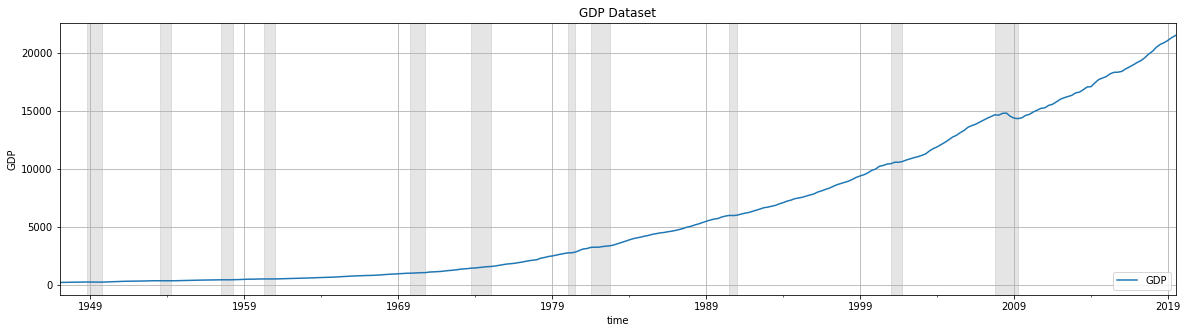

In [19]:
start_date = min(gdp_data['DATE'])
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
gdp_data.plot(x="DATE", y="GDP", label="GDP", figsize = (20,5))
plt.xlabel("time")
plt.ylabel("GDP")
plt.grid()
for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.2)
plt.legend(loc="best")
plt.title("GDP Dataset")
plt.show()

#### Gross Domestic Income (GDI)
https://fred.stlouisfed.org/series/GDI

In [20]:
gdi_data = pd.read_csv('Data/GDI.csv', na_values='.').dropna()
gdi_data['DATE'] = pd.to_datetime(gdi_data['DATE'])

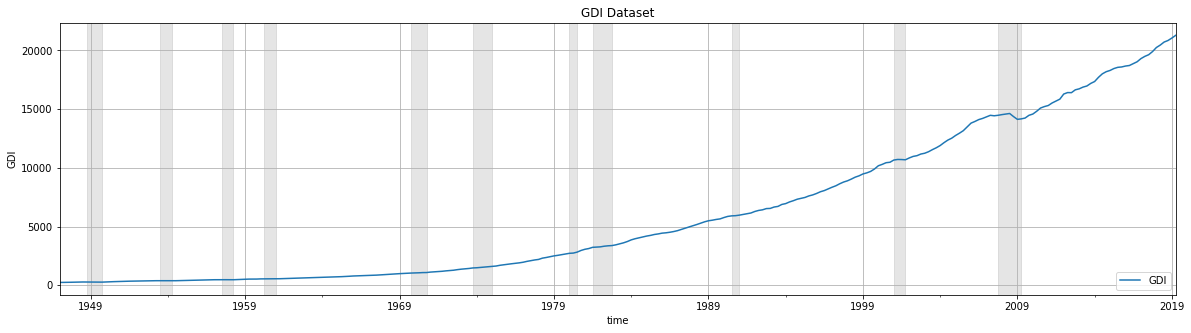

In [21]:
start_date = min(gdi_data['DATE'])
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
gdi_data.plot(x="DATE", y="GDI", label="GDI", figsize = (20,5))
plt.grid()
plt.xlabel("time")
plt.ylabel("GDI")
for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.2)
plt.legend(loc="best")
plt.title("GDI Dataset")
plt.show()

#### Corporate Profits After Tax (without IVA and CCAdj) (CP)
https://fred.stlouisfed.org/series/CP

In [22]:
cp_data = pd.read_csv('Data/CP.csv', na_values='.').dropna()
cp_data['DATE'] = pd.to_datetime(cp_data['DATE'])

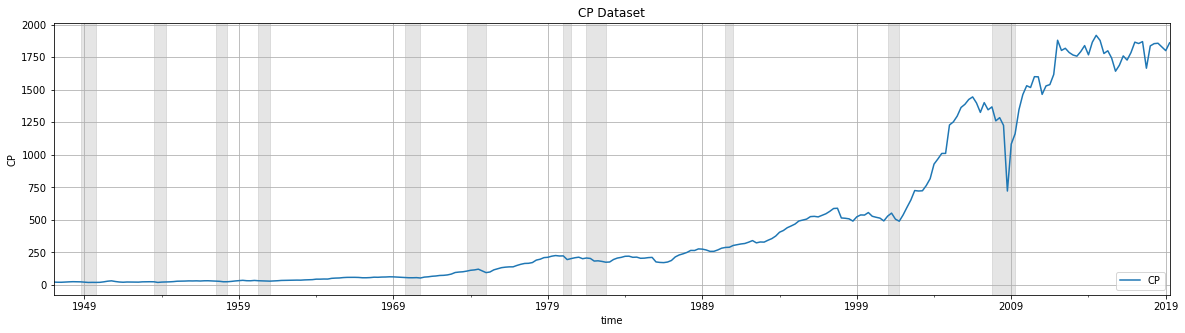

In [23]:
start_date = min(cp_data['DATE'])
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
cp_data.plot(x="DATE", y="CP", label="CP", figsize = (20,5))
plt.xlabel("time")
plt.ylabel("CP")
plt.grid()
for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.2)
plt.legend(loc="best")
plt.title("CP Dataset")
plt.show()

#### Federal government current tax receipts: Personal current taxes
https://fred.stlouisfed.org/series/A074RC1Q027SBEA

In [24]:
personalTaxes_data = pd.read_csv('Data/A074RC1Q027SBEA.csv', na_values='.').dropna()
personalTaxes_data['DATE'] = pd.to_datetime(personalTaxes_data['DATE'])

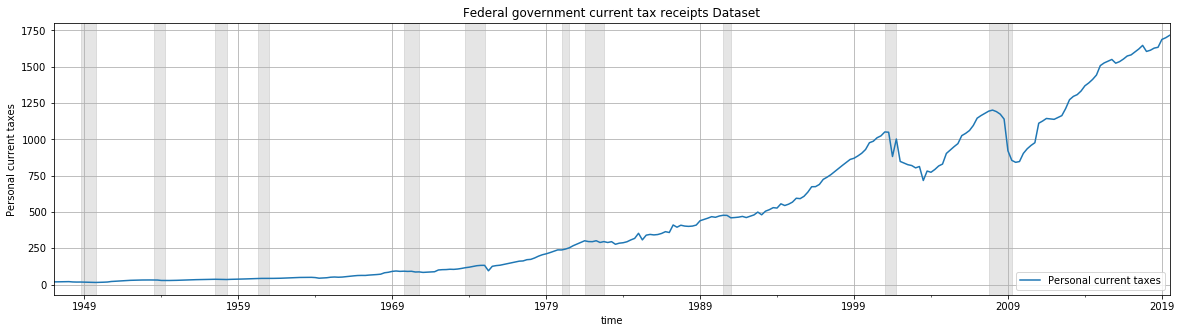

In [26]:
start_date = min(personalTaxes_data['DATE'])
recession_data_new = recession_data.loc[(recession_data['Peak']>= start_date)]
personalTaxes_data.plot(x="DATE", y="A074RC1Q027SBEA", label="Personal current taxes", figsize = (20,5))
plt.grid()
plt.xlabel("time")
plt.ylabel("Personal current taxes")
for _, rows in recession_data_new.iterrows():
    plt.axvspan(rows['Peak'],rows['Trough'], color='gray',alpha=0.2)
plt.legend(loc="best")
plt.title("Federal government current tax receipts Dataset")
plt.show()

### Explain how the information may or may not be used

**GDP and GDI have some relationship with recession**

Yes. From GDP and GDI chart, that for the most part, recessions occur when GDP/GDI dips. 

**During recession, corporate profits after tax might be decreased**

Yes. From CP Dataset chart, most of the part, especially in the year around 2009, the corporate profits achieved the local minimum when recession occurs.

**Decrease personal taxes, may help to deal with recession.**

Need more information. From the last chart, the government cuts personal tax to deal with each recession. Obviously, when people are out of work, it's fair for them to expect to pay less taxes. It's also good economics, since soncumers with more money to spend can help push the economy out of a recession. However, we still need more information to figure out whether decrease personal taxes could help to deal with recession.



### References:
- https://www.investopedia.com/terms/s/sma.asp
- https://www.investopedia.com/terms/g/gdi.asp
- https://www.stlouisfed.org/on-the-economy/2016/march/better-measurement-output-gdp-gdi
- https://fred.stlouisfed.org/series/GDP
- https://fred.stlouisfed.org/series/GDI
- https://fred.stlouisfed.org/series/A074RC1Q027SBEA
- https://fred.stlouisfed.org/series/CP